In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [3]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


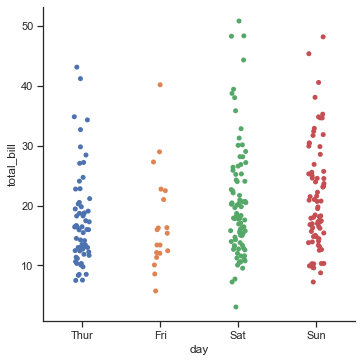

In [5]:
sns.catplot(x="day", y="total_bill", data=tips)

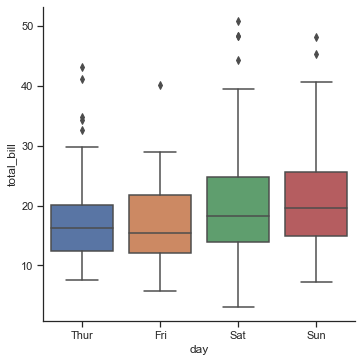

In [6]:
sns.catplot(x="day", y="total_bill", data=tips, kind="box")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

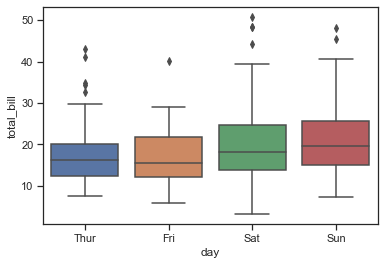

In [7]:
sns.boxplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

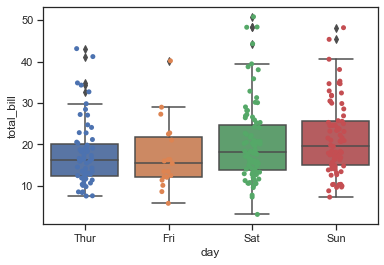

In [8]:
sns.stripplot(x="day", y="total_bill", data=tips)
sns.boxplot(x="day", y="total_bill", data=tips)

In [9]:
group = tips.groupby(["day"])["total_bill"].describe()
group

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


In [10]:
Thur = group.loc["Thur"]
Thur

count    62.000000
mean     17.682742
std       7.886170
min       7.510000
25%      12.442500
50%      16.200000
75%      20.155000
max      43.110000
Name: Thur, dtype: float64

In [11]:
Thur["75%"]

20.155

In [12]:
IQR = Thur["75%"] - Thur["25%"]
IQR

7.712500000000002

In [13]:
Thur_min = Thur["75%"] - (1.5 * IQR)
Thur_max = Thur["75%"] + (1.5 * IQR)
IQR, Thur_min, Thur_max

(7.712500000000002, 8.586249999999998, 31.723750000000003)

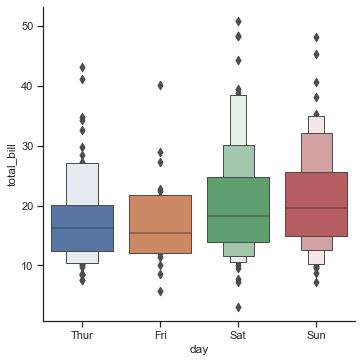

In [14]:
sns.catplot(x="day", y="total_bill", data=tips, kind="boxen")

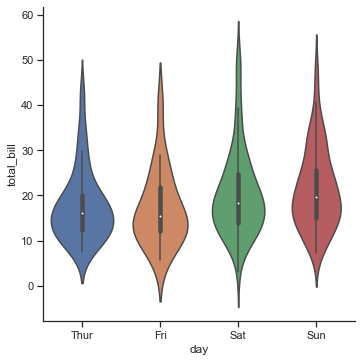

In [15]:
sns.catplot(x="day", y="total_bill", data=tips, kind="violin")

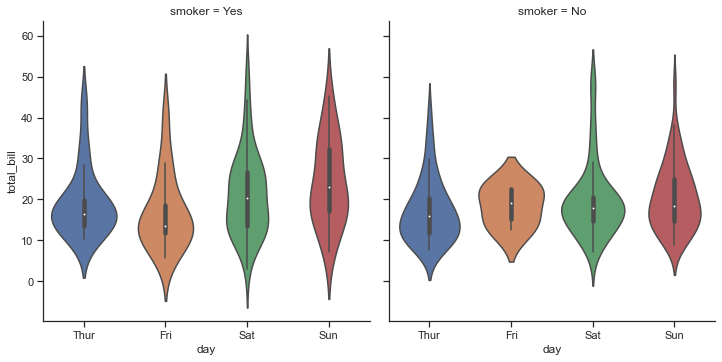

In [17]:
sns.catplot(x="day", y="total_bill", data=tips, kind="violin", col="smoker")

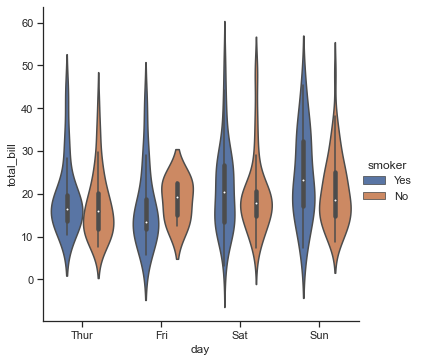

In [18]:
sns.catplot(x="day", y="total_bill", data=tips, kind="violin", hue="smoker")

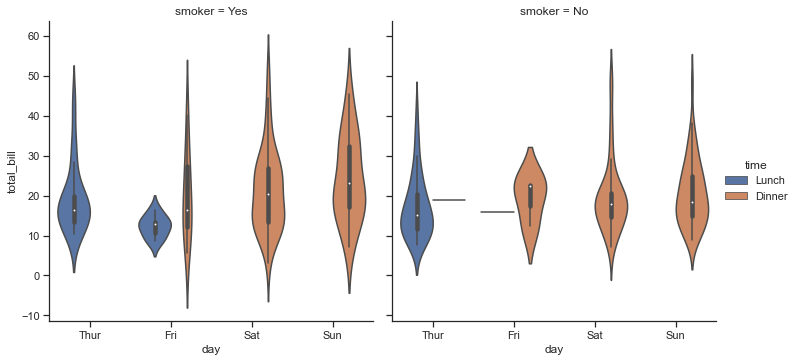

In [19]:
sns.catplot(x="day", y="total_bill", data=tips, kind="violin", col="smoker", hue="time")

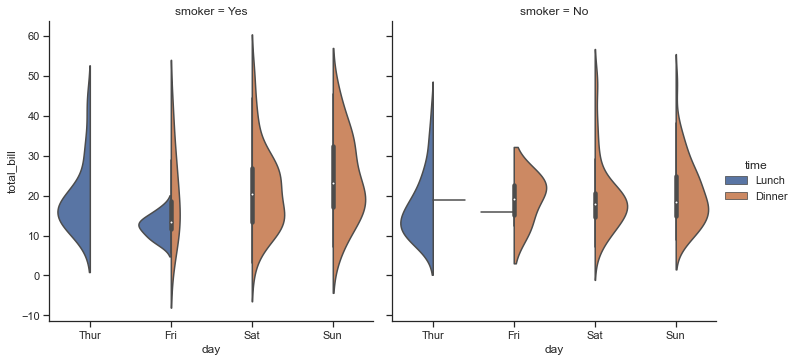

In [20]:
sns.catplot(x="day", y="total_bill", data=tips, kind="violin", col="smoker", hue="time",
            split=True)

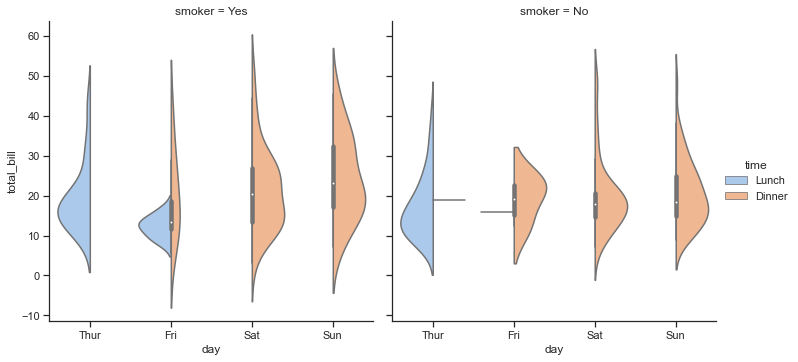

In [30]:
sns.catplot(x="day", y="total_bill", data=tips, kind="violin", col="smoker", hue="time",
            split=True, palette="pastel")

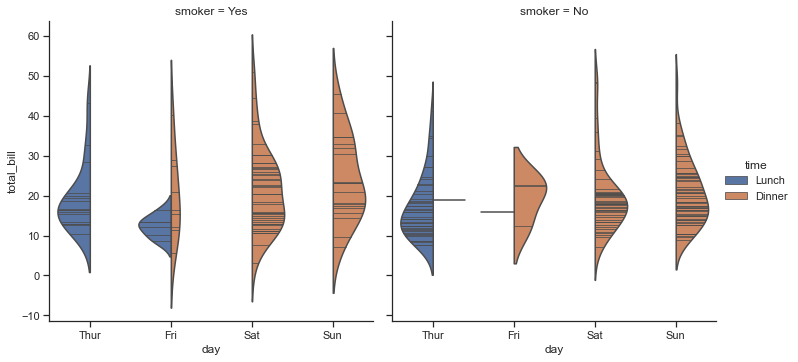

In [29]:
sns.catplot(x="day", y="total_bill", data=tips, kind="violin", col="smoker", hue="time",
            split=True, inner="stick")

In [21]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
tips

,total_bill,tip,sex,smoker,day,time,size,weekend
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,True
240,27.18,2.00,Female,Yes,Sat,Dinner,2,True
241,22.67,2.00,Male,Yes,Sat,Dinner,2,True
242,17.82,1.75,Male,No,Sat,Dinner,2,True


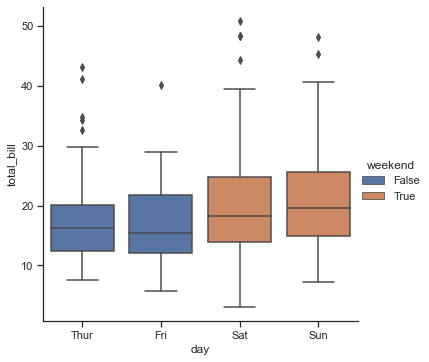

In [24]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", data=tips, kind="box", hue="weekend",
            dodge=False)

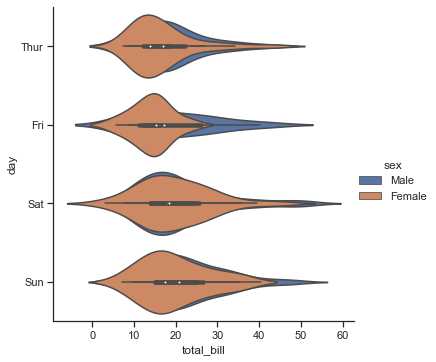

In [25]:
sns.catplot(x="total_bill", y="day", data=tips, kind="violin", hue="sex",
            dodge=False)

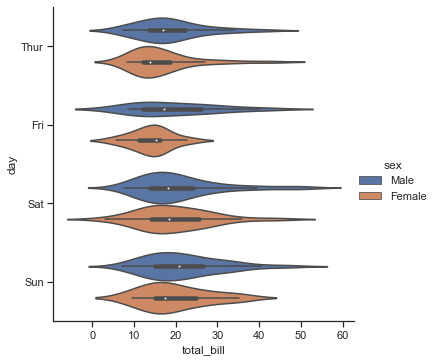

In [26]:
sns.catplot(x="total_bill", y="day", data=tips, kind="violin", hue="sex")

<AxesSubplot:xlabel='total_bill', ylabel='day'>

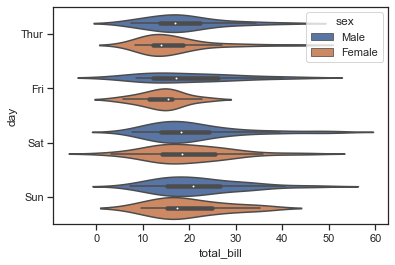

In [27]:
sns.violinplot(x="total_bill", y="day", data=tips, hue="sex")

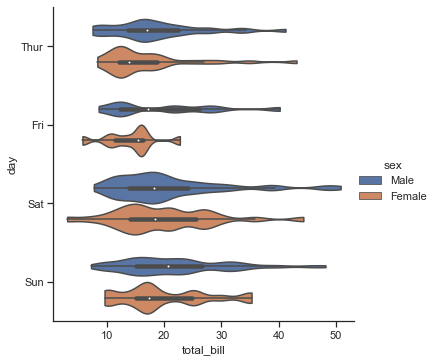

In [28]:
sns.catplot(x="total_bill", y="day", data=tips, kind="violin", hue="sex", bw=.2, cut=0)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

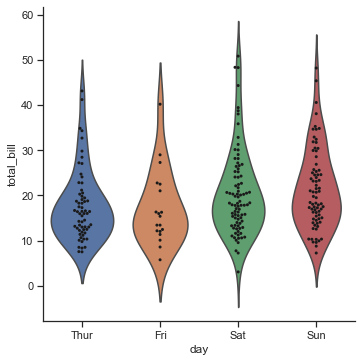

In [31]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)